In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
data = pd.read_csv("Probabilities Table.csv")
display(data)

,ratClusterName,ratClusterCount,ratTotalAppearences
0,aladdin A1,28,53
1,aladdin A2,3,53
2,aladdin A3,22,53
3,aladdin B1,22,53
4,aladdin B2,28,53
...,...,...,...
1173,wanda E2,1,1
1174,wanda F3,1,1
1175,wanda J2,2,2
1176,wanda K1,2,2


In [3]:
def get_probabilities(row):
    return row.ratClusterCount/row.ratTotalAppearences

In [4]:
data['Probability'] = data.apply(get_probabilities,axis=1)
display(data)

,ratClusterName,ratClusterCount,ratTotalAppearences,Probability
0,aladdin A1,28,53,0.528302
1,aladdin A2,3,53,0.056604
2,aladdin A3,22,53,0.415094
3,aladdin B1,22,53,0.415094
4,aladdin B2,28,53,0.528302
...,...,...,...,...
1173,wanda E2,1,1,1.000000
1174,wanda F3,1,1,1.000000
1175,wanda J2,2,2,1.000000
1176,wanda K1,2,2,1.000000


In [5]:
def get_name(row):
    #print(row.rat_cluster_name.split())
    return row.ratClusterName.split()[0]

In [6]:
data['rat_name'] = data.apply(get_name,axis=1)
display(data)

,ratClusterName,ratClusterCount,ratTotalAppearences,Probability,rat_name
0,aladdin A1,28,53,0.528302,aladdin
1,aladdin A2,3,53,0.056604,aladdin
2,aladdin A3,22,53,0.415094,aladdin
3,aladdin B1,22,53,0.415094,aladdin
4,aladdin B2,28,53,0.528302,aladdin
...,...,...,...,...,...
1173,wanda E2,1,1,1.000000,wanda
1174,wanda F3,1,1,1.000000,wanda
1175,wanda J2,2,2,1.000000,wanda
1176,wanda K1,2,2,1.000000,wanda


In [7]:
def get_cluster(row):
    #print(row.rat_cluster_name.split())
    return row.ratClusterName.split()[1]

In [8]:
data['cluster_name'] = data.apply(get_cluster,axis=1)
display(data)

,ratClusterName,ratClusterCount,ratTotalAppearences,Probability,rat_name,cluster_name
0,aladdin A1,28,53,0.528302,aladdin,A1
1,aladdin A2,3,53,0.056604,aladdin,A2
2,aladdin A3,22,53,0.415094,aladdin,A3
3,aladdin B1,22,53,0.415094,aladdin,B1
4,aladdin B2,28,53,0.528302,aladdin,B2
...,...,...,...,...,...,...
1173,wanda E2,1,1,1.000000,wanda,E2
1174,wanda F3,1,1,1.000000,wanda,F3
1175,wanda J2,2,2,1.000000,wanda,J2
1176,wanda K1,2,2,1.000000,wanda,K1


In [9]:
del data["ratClusterName"]


In [10]:
display(data)
listOfRats = data["rat_name"].values.tolist()
ratDict = {}
for rat in listOfRats:
    try:
        ratDict[rat] = ratDict[rat] +1
    except:
        ratDict[rat] = 1
ratList = list(ratDict.keys())
print(ratList)

,ratClusterCount,ratTotalAppearences,Probability,rat_name,cluster_name
0,28,53,0.528302,aladdin,A1
1,3,53,0.056604,aladdin,A2
2,22,53,0.415094,aladdin,A3
3,22,53,0.415094,aladdin,B1
4,28,53,0.528302,aladdin,B2
...,...,...,...,...,...
1173,1,1,1.000000,wanda,E2
1174,1,1,1.000000,wanda,F3
1175,2,2,1.000000,wanda,J2
1176,2,2,1.000000,wanda,K1


['aladdin', 'alexis', 'andrea', 'barbie', 'bopeep', 'buttercup', 'carl', 'fiona', 'harley', 'jafar', 'jimi', 'johnny', 'jr', 'juana', 'ken', 'kobe', 'kryssia', 'mike', 'monster', 'neftali', 'raissa', 'raven', 'renata', 'sarah', 'scar', 'shakira', 'simba', 'slinky', 'sully', 'trixie', 'vision', 'wanda']


In [11]:
ratProbabilitiesDict = {}
ratClustersDict = {}

In [12]:
grouped_obj = data.groupby("rat_name")
separator_string= "\n"+"-"*50+"\n"

In [13]:
for rat_name, filtered_df in grouped_obj:
    #print(rat_name,end=separator_string)
    ratClustersDict[rat_name] = filtered_df["cluster_name"].values.tolist()
    ratProbabilitiesDict[rat_name] = filtered_df['Probability'].values.tolist()
    #print(filtered_df[["cluster_name","Probability"]].head(3),end=separator_string)

In [14]:
allClustersList = ["A1","A2","A3",
"D1","D2","D3",
"G1","G2","G3","G4",
"J1","J2","J3","J4",
"M1","M2","M3","M4"]
print(ratList)

['aladdin', 'alexis', 'andrea', 'barbie', 'bopeep', 'buttercup', 'carl', 'fiona', 'harley', 'jafar', 'jimi', 'johnny', 'jr', 'juana', 'ken', 'kobe', 'kryssia', 'mike', 'monster', 'neftali', 'raissa', 'raven', 'renata', 'sarah', 'scar', 'shakira', 'simba', 'slinky', 'sully', 'trixie', 'vision', 'wanda']


In [15]:
#check to see if the tempClusters[j] == allClustersList[k]
#yes defaultProbabilites[k] = tempClusters[j]
#no then advance the loop
allRatProbabilities = []
allRatClusters = []
for i in ratList:
    tempClusters = ratClustersDict[i]
    tempProbabilities = ratProbabilitiesDict[i]
    #defaultProbabilities = np.zeros(len(allClustersList))
    tempDict = {"A1":0,"A2":0,"A3":0,
        "D1":0,"D2":0,"D3":0,
        "G1":0,"G2":0,"G3":0,"G4":0,
        "J1":0,"J2":0,"J3":0,"J4":0,
        "M1":0,"M2":0,"M3":0,"M4":0}
    for j,value in enumerate(tempClusters):
        if value in list(tempDict.keys()):
            tempDict[value] = tempProbabilities[j]
    allRatProbabilities.append(list(tempDict.values()))
    allRatClusters.append(list(tempDict.keys()))

#for i in range(len(allRatProbabilities)):
#    print(ratList[i])
#    for j in range(len(allRatProbabilities[i])):
#        print(allRatClusters[i][j],":",allRatProbabilities[i][j])
        


In [16]:
display(allRatProbabilities)

[[0.5283018867924528,
  0.05660377358490566,
  0.41509433962264153,
  0.675,
  0.25,
  0.075,
  0.8055555555555556,
  0.1111111111111111,
  0,
  0.08333333333333333,
  0.14893617021276595,
  0.1702127659574468,
  0,
  0.6808510638297872,
  0.29545454545454547,
  0.06818181818181818,
  0.6363636363636364,
  0],
 [0.36363636363636365,
  0.06818181818181818,
  0.5681818181818182,
  0.9130434782608695,
  0.043478260869565216,
  0.043478260869565216,
  0.5833333333333334,
  0.2777777777777778,
  0.027777777777777776,
  0.1111111111111111,
  0.34285714285714286,
  0.02857142857142857,
  0,
  0.6285714285714286,
  0.43478260869565216,
  0.1956521739130435,
  0.3695652173913043,
  0],
 [0.44,
  0.1,
  0.46,
  0.8857142857142857,
  0.11428571428571428,
  0,
  0.8,
  0,
  0.04,
  0.16,
  0.1282051282051282,
  0.02564102564102564,
  0.1282051282051282,
  0.717948717948718,
  0.35294117647058826,
  0.0784313725490196,
  0.5686274509803921,
  0],
 [0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 

In [17]:
allRatProbabilitiesArray = np.array(allRatProbabilities)
display(allRatProbabilitiesArray)

array([[0.52830189, 0.05660377, 0.41509434, 0.675     , 0.25      ,
        0.075     , 0.80555556, 0.11111111, 0.        , 0.08333333,
        0.14893617, 0.17021277, 0.        , 0.68085106, 0.29545455,
        0.06818182, 0.63636364, 0.        ],
       [0.36363636, 0.06818182, 0.56818182, 0.91304348, 0.04347826,
        0.04347826, 0.58333333, 0.27777778, 0.02777778, 0.11111111,
        0.34285714, 0.02857143, 0.        , 0.62857143, 0.43478261,
        0.19565217, 0.36956522, 0.        ],
       [0.44      , 0.1       , 0.46      , 0.88571429, 0.11428571,
        0.        , 0.8       , 0.        , 0.04      , 0.16      ,
        0.12820513, 0.02564103, 0.12820513, 0.71794872, 0.35294118,
        0.07843137, 0.56862745, 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
    

In [18]:
allDistances = []
for i, slice in enumerate(allRatProbabilitiesArray):
    distances = euclidean_distances([slice],allRatProbabilitiesArray)
    allDistances.append(distances)
    distances2Names = dict(zip(distances[0],ratList))
    sortedValues = sorted(distances2Names.keys())
    nearest_neighbors = sortedValues[:4]
    #print(distances2Names[distances[0][0]])
    print(ratList[i]+"'s 4 Nearest Neighbors are: \t\t\t ","1.)",distances2Names[nearest_neighbors[0]],
          "2.)",distances2Names[nearest_neighbors[1]],
          "3.)",distances2Names[nearest_neighbors[2]],
          "4.)",distances2Names[nearest_neighbors[3]],"\n")

aladdin's 4 Nearest Neighbors are: 			  1.) aladdin 2.) neftali 3.) jafar 4.) shakira 

alexis's 4 Nearest Neighbors are: 			  1.) alexis 2.) harley 3.) sully 4.) shakira 

andrea's 4 Nearest Neighbors are: 			  1.) andrea 2.) jafar 3.) harley 4.) shakira 

barbie's 4 Nearest Neighbors are: 			  1.) barbie 2.) alexis 3.) vision 4.) kobe 

bopeep's 4 Nearest Neighbors are: 			  1.) bopeep 2.) sarah 3.) fiona 4.) buttercup 

buttercup's 4 Nearest Neighbors are: 			  1.) buttercup 2.) raven 3.) raissa 4.) aladdin 

carl's 4 Nearest Neighbors are: 			  1.) carl 2.) raissa 3.) harley 4.) kobe 

fiona's 4 Nearest Neighbors are: 			  1.) fiona 2.) sully 3.) shakira 4.) jafar 

harley's 4 Nearest Neighbors are: 			  1.) harley 2.) renata 3.) jafar 4.) andrea 

jafar's 4 Nearest Neighbors are: 			  1.) jafar 2.) shakira 3.) jimi 4.) harley 

jimi's 4 Nearest Neighbors are: 			  1.) jimi 2.) jafar 3.) shakira 4.) raven 

johnny's 4 Nearest Neighbors are: 			  1.) johnny 2.) kobe 3.) mike 4.) sca

In [19]:
from matplotlib import pyplot as plt
import numpy as np

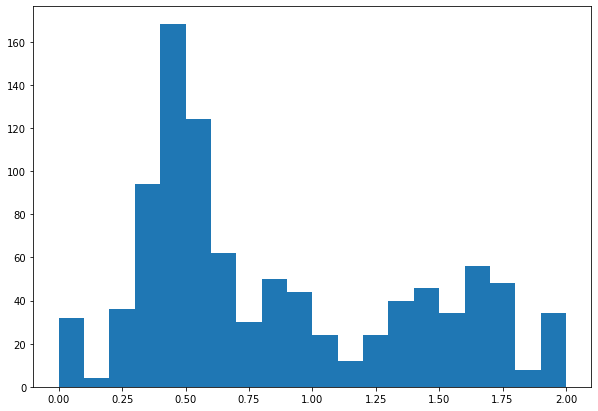

In [20]:
oneDimensionalDistances = np.array(allDistances)
oneDimensionalDistances = oneDimensionalDistances.flatten()

fig, ax = plt.subplots(figsize = (10,7))
ax.hist(oneDimensionalDistances,bins = [0,0.1,0.2,.3,0.4,.5,0.6,.7,0.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
plt.show()


In [21]:
allDistances = []
for i, slice in enumerate(allRatProbabilitiesArray):
    distances = euclidean_distances([slice],allRatProbabilitiesArray)
    allDistances.append(distances)
    distances2Names = dict(zip(distances[0],ratList))
    sortedValues = sorted(distances2Names.keys())
    nearest_neighbors = sortedValues[:4]
    #print(distances2Names[distances[0][0]])
    print(ratList[i]+"'s Furthest Neighbors are: \t\t\t ",
          distances2Names[sortedValues[-14]],
          distances2Names[sortedValues[-15]],
          distances2Names[sortedValues[-16]],
          distances2Names[sortedValues[-17]],
          "\n")


aladdin's Furthest Neighbors are: 			  mike jr sully fiona 

alexis's Furthest Neighbors are: 			  fiona raven jr neftali 

andrea's Furthest Neighbors are: 			  jr simba johnny alexis 

barbie's Furthest Neighbors are: 			  mike aladdin carl fiona 

bopeep's Furthest Neighbors are: 			  aladdin sully harley jimi 

buttercup's Furthest Neighbors are: 			  renata johnny andrea bopeep 

carl's Furthest Neighbors are: 			  raven juana johnny kryssia 

fiona's Furthest Neighbors are: 			  johnny carl jimi kobe 

harley's Furthest Neighbors are: 			  simba fiona jr raven 

jafar's Furthest Neighbors are: 			  johnny alexis juana jr 

jimi's Furthest Neighbors are: 			  johnny simba fiona jr 

johnny's Furthest Neighbors are: 			  andrea fiona raissa renata 

jr's Furthest Neighbors are: 			  andrea juana neftali kobe 

juana's Furthest Neighbors are: 			  renata scar simba jimi 

ken's Furthest Neighbors are: 			  neftali trixie sarah juana 

kobe's Furthest Neighbors are: 			  raven mike f

In [22]:
print(ratList)

['aladdin', 'alexis', 'andrea', 'barbie', 'bopeep', 'buttercup', 'carl', 'fiona', 'harley', 'jafar', 'jimi', 'johnny', 'jr', 'juana', 'ken', 'kobe', 'kryssia', 'mike', 'monster', 'neftali', 'raissa', 'raven', 'renata', 'sarah', 'scar', 'shakira', 'simba', 'slinky', 'sully', 'trixie', 'vision', 'wanda']


In [23]:
oldRatList = ['aladdin', 'alexis', 'andrea', #3
 'carl', 'fiona', 'harley',#6
 'jafar', 'jimi', 'johnny',#9
 'jr', 'juana', 'kobe',#12
 'kryssia', 'mike','neftali',#15
 'raissa', 'raven', 'renata',#18
 'sarah', 'scar', 'shakira', #21
 'simba', 'sully']#23


In [24]:
allOldRatProbabilities = []
allOldRatClusters = []
for i in oldRatList:
    tempClusters = ratClustersDict[i]
    tempProbabilities = ratProbabilitiesDict[i]
    defaultProbabilities = np.zeros(len(allClustersList))
    tempDict = {"A1":0,"A2":0,"A3":0,
        "D1":0,"D2":0,"D3":0,
        "G1":0,"G2":0,"G3":0,"G4":0,
        "J1":0,"J2":0,"J3":0,"J4":0,
        "M1":0,"M2":0,"M3":0}
    for j,value in enumerate(tempClusters):
        if value in list(tempDict.keys()):
            tempDict[value] = tempProbabilities[j]
    allOldRatProbabilities.append(list(tempDict.values()))
    allOldRatClusters.append(list(tempDict.keys()))

In [25]:
allOldRatDistances = []
allOldRatProbabilitiesArray = np.array(allOldRatProbabilities)
for i, slice in enumerate(allOldRatProbabilitiesArray):
    distances = euclidean_distances([slice],allOldRatProbabilitiesArray)
    allOldRatDistances.append(distances)
    distances2Names = dict(zip(distances[0],oldRatList))
    sortedValues = sorted(distances2Names.keys())
    nearest_neighbors = sortedValues[:4]
    #print(distances2Names[distances[0][0]])
    print(oldRatList[i]+"'s NNs: \t ","1.)",
          distances2Names[nearest_neighbors[0]],
          "2.)",distances2Names[nearest_neighbors[1]],
          "3.)",distances2Names[nearest_neighbors[2]],
          "4.)",distances2Names[nearest_neighbors[3]],"\n")

aladdin's NNs: 	  1.) aladdin 2.) neftali 3.) jafar 4.) shakira 

alexis's NNs: 	  1.) alexis 2.) harley 3.) sully 4.) shakira 

andrea's NNs: 	  1.) andrea 2.) jafar 3.) harley 4.) shakira 

carl's NNs: 	  1.) carl 2.) raissa 3.) harley 4.) kobe 

fiona's NNs: 	  1.) fiona 2.) sully 3.) shakira 4.) jafar 

harley's NNs: 	  1.) harley 2.) renata 3.) jafar 4.) andrea 

jafar's NNs: 	  1.) jafar 2.) shakira 3.) jimi 4.) harley 

jimi's NNs: 	  1.) jimi 2.) jafar 3.) shakira 4.) raven 

johnny's NNs: 	  1.) johnny 2.) kobe 3.) mike 4.) scar 

jr's NNs: 	  1.) jr 2.) mike 3.) harley 4.) raissa 

juana's NNs: 	  1.) juana 2.) aladdin 3.) neftali 4.) shakira 

kobe's NNs: 	  1.) kobe 2.) sarah 3.) harley 4.) neftali 

kryssia's NNs: 	  1.) kryssia 2.) scar 3.) carl 4.) simba 

mike's NNs: 	  1.) mike 2.) jr 3.) johnny 4.) sarah 

neftali's NNs: 	  1.) neftali 2.) aladdin 3.) jafar 4.) shakira 

raissa's NNs: 	  1.) raissa 2.) carl 3.) simba 4.) harley 

raven's NNs: 	  1.) raven 2.) jimi 3.)

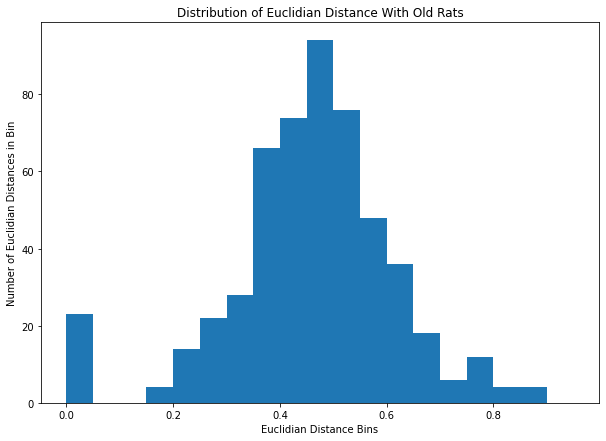

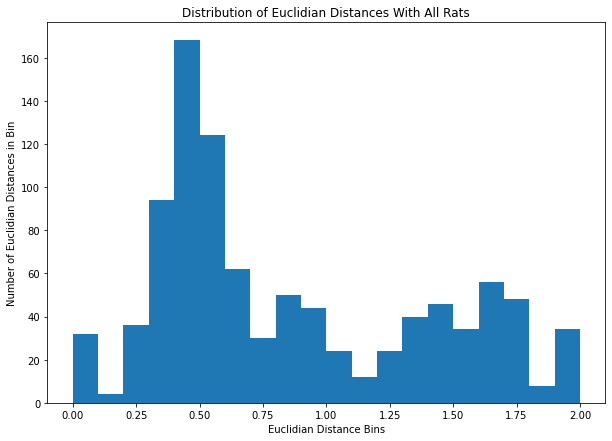

In [26]:
oneDimensionalOldRatDistances = np.array(allOldRatDistances)
oneDimensionalOldRatDistances = oneDimensionalOldRatDistances.flatten()

fig, ax = plt.subplots(figsize = (10,7))
ax.hist(oneDimensionalOldRatDistances,bins = np.arange(0,1,0.05))
plt.xlabel("Euclidian Distance Bins")
plt.ylabel("Number of Euclidian Distances in Bin")
plt.title("Distribution of Euclidian Distance With Old Rats")
plt.savefig('Histogram of Old Rat Euclidian Distances.pdf')
plt.show()
  

oneDimensionalDistances = np.array(allDistances)
oneDimensionalDistances = oneDimensionalDistances.flatten()

fig, ax = plt.subplots(figsize = (10,7))
ax.hist(oneDimensionalDistances,bins = [0,0.1,0.2,.3,0.4,.5,0.6,.7,0.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
plt.xlabel("Euclidian Distance Bins")
plt.ylabel("Number of Euclidian Distances in Bin")
plt.title("Distribution of Euclidian Distances With All Rats")
plt.savefig('Histogram of All Rat Euclidian Distances.pdf')  
plt.show()
